### Quantum Teleportation - Instantaneous Transfer of Information

Quantum teleportation, one of the most fascinating applications of quantum mechanics, represents a fundamental breakthrough in the realm of quantum information science. It leverages the counterintuitive principles of quantum entanglement and superposition to transmit quantum states from one location to another, without physically moving the particles themselves. This process does not teleport the particle but rather its quantum state — the information embedded in the quantum system — from a sender (traditionally called Alice) to a receiver (Bob), with the help of a shared entangled pair.

The teleportation process begins with Alice and Bob sharing an entangled pair of qubits. Entanglement is a quantum phenomenon where two or more particles become intertwined in such a way that the state of one particle is immediately correlated with the state of the other, no matter how far apart they are. Once this entangled pair is established, Alice can then teleport an unknown quantum state by performing a set of quantum operations.

Alice starts by entangling the qubit she wants to teleport with her half of the entangled pair. She then performs a Bell-state measurement on her qubits. This measurement collapses the entangled state and effectively sends the information about the quantum state to Bob, though it’s encoded in classical bits. Alice sends these two classical bits to Bob via a traditional communication channel, instructing him on how to apply a set of operations (Pauli gates) to his qubit. Once Bob applies these operations, his qubit takes on the state of Alice’s original qubit, successfully completing the teleportation process.

What makes this remarkable is that the quantum state transfer happens instantaneously due to the entanglement, but the classical information still needs to be transmitted at sub-light speeds, ensuring no faster-than-light communication occurs, preserving causality. The "teleported" state is destroyed in Alice’s system and recreated in Bob’s, ensuring that the quantum information is never duplicated, maintaining one of the key postulates of quantum mechanics, known as the no-cloning theorem.

Quantum teleportation has broad implications for the future of quantum computing and quantum communication. It forms the backbone of quantum networks, enabling the secure transfer of quantum information across distances, paving the way for quantum cryptography, distributed quantum computing, and perhaps even future quantum internet architectures. Though not quite the teleportation we see in science fiction, it is a revolutionary step forward in the understanding and manipulation of quantum information.

Here's a simple example in Qiskit to demonstrate quantum teleportation:

Quantum teleportation is grounded in some of the most fundamental concepts of quantum mechanics: **entanglement**, **superposition**, and **measurement**. Below are some of the key mathematical concepts and steps behind the process:

### 1. **Quantum States and Qubits**

A qubit (quantum bit) is described by a superposition of the basis states \( |0\rangle \) and \( |1\rangle \):

$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle
$$

where $ \alpha $ and $ \beta $ are complex numbers, and $ |\alpha|^2 + |\beta|^2 = 1 $. This qubit is the one we want to teleport.

### 2. **Entanglement**

Alice and Bob share an entangled pair of qubits, typically in the Bell state $ |\Phi^+\rangle $:

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} \left( |00\rangle + |11\rangle \right)
$$

This state describes the entanglement between Alice's qubit $ A_2 $ and Bob's qubit $B $, where they are perfectly correlated.

### 3. **Composite System**

The overall state of the system is a three-qubit state consisting of Alice's qubit $ A_1 $ to be teleported, and the entangled pair $A_2B $. The combined state of the system is:

$$
|\psi_{\text{total}}\rangle = |\psi\rangle \otimes |\Phi^+\rangle
$$

Substituting $ |\psi\rangle = \alpha|0\rangle + \beta|1\rangle $ into this, we get:

$$
|\psi_{\text{total}}\rangle = \left( \alpha|0\rangle + \beta|1\rangle \right) \otimes \frac{1}{\sqrt{2}} \left( |00\rangle + |11\rangle \right)
$$

### 4. **Bell Measurement**

Alice performs a Bell-state measurement on her two qubits $ A_1A_2 $. The measurement collapses the three-qubit system into one of the four Bell states. We can rewrite the total state $|\psi_{\text{total}}\rangle $ in terms of these Bell states:

$$
|\psi_{\text{total}}\rangle = \frac{1}{2} \left[ |\Phi^+\rangle_{A_1A_2} (\alpha|0\rangle_B + \beta|1\rangle_B) + |\Phi^-\rangle_{A_1A_2} (\alpha|0\rangle_B - \beta|1\rangle_B) + |\Psi^+\rangle_{A_1A_2} (\beta|0\rangle_B + \alpha|1\rangle_B) + |\Psi^-\rangle_{A_1A_2} (\beta|0\rangle_B - \alpha|1\rangle_B) \right]
$$

This expresses the total state as a superposition of Alice's measurement results and Bob's qubit. Depending on the outcome of Alice's Bell measurement, Bob's qubit ends up in one of the four possible states.


The teleportation process can be summarized in terms of the quantum state transformations and measurements:

$$
|\psi\rangle_{A_1} \otimes |\Phi^+\rangle_{A_2B} \rightarrow \frac{1}{2} \sum_{i,j} |\text{Bell}_{ij}\rangle_{A_1A_2} U_{ij}|\psi\rangle_B
$$

Here, $ U_{ij} $ represents the unitary operation Bob applies depending on the outcome of Alice’s Bell-state measurement $ |\text{Bell}_{ij}\rangle $.

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Create a Quantum Circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

In [3]:
# Step 1: Create an entangled pair between qubit 1 and qubit 2
qc.h(1)
qc.cx(1, 2)

In [4]:
# Step 2: Prepare qubit 0 in the state to be teleported
qc.x(0)

In [5]:
# Step 3: Perform Bell measurement on qubit 0 and qubit 1
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])

In [6]:
# Step 4: Apply conditional operations based on the measurement outcomes
qc.cx(1, 2)
qc.cz(0, 2)

In [7]:
# Measure the teleported qubit
qc.measure(2, 2)

In [8]:
# Use the Qiskit Aer simulator to run the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

In [9]:
# Get the counts of outcomes
counts = result.get_counts()
print("Counts:", counts)

Counts: {'100': 259, '101': 255, '110': 251, '111': 259}


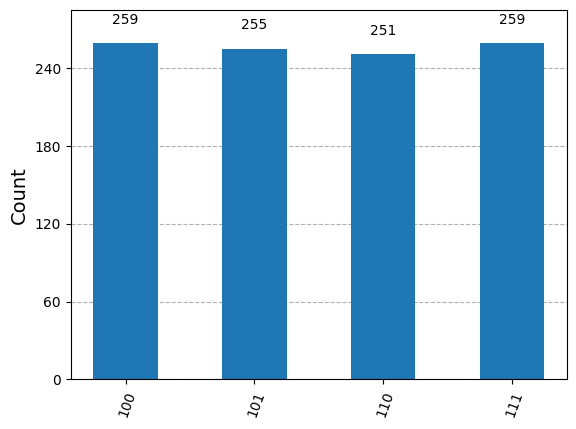

In [10]:
# Visualize the results
plot_histogram(counts)
plt.show()

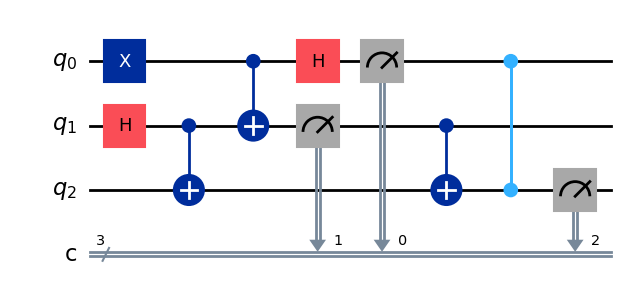

In [11]:
# Draw the circuit
qc.draw('mpl') 
plt.show()

In this example, we use three qubits. The first two qubits are entangled, creating a shared state. We then prepare the third qubit (qubit 0) in a state to be teleported. Through a series of operations and measurements, the state of qubit 0 is transferred to qubit 2.